In [1]:
%matplotlib ipympl
from models import *
# from models import find_index_of_nearest
from impedance.preprocessing import readCSV, readBioLogic
from impedance.visualization import plot_nyquist,plot_bode
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# from arbitau import give_z_for_arbitary_tau, tau_plotter
from scipy.integrate import solve_bvp
import mpmath 

c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


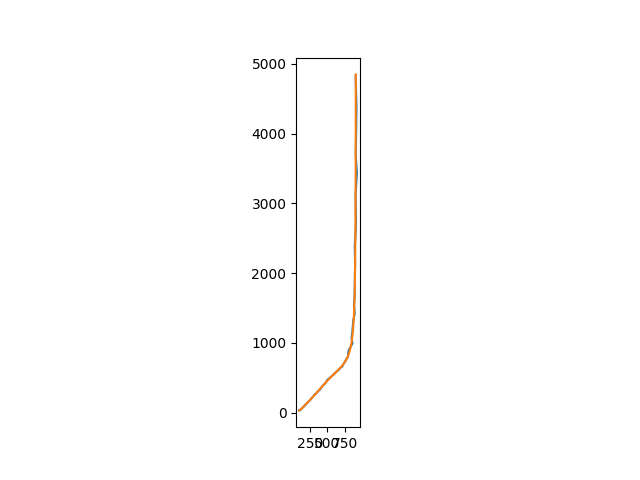

In [2]:
freq_list=np.logspace(-1,3,100)
#parameter for the TLM
Q_dt=6.61e-4
alpha_dt=1

R1_dt=1000
delta1_dt=0.12
R2_dt=2000
delta2_dt=0.17
R3_dt=2.15*194.5


#initial guesses for the HFR intercept and for any semicircle like features in the EIS data
Rhfr=40
Rrxn=40
Qdl=1e-6
alpha2=1

cmodel=CustomCircuit(initial_guess=[R1_dt,R1_dt*Q_dt,R2_dt*Q_dt,alpha_dt,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMlinnew_1-R_1-p(R_2,CPE_1)")
mp.dps=300
zexp=cmodel.predict(frequencies=freq_list)
zexp_noise=np.real(zexp)+np.random.normal(0,0.01,(len(zexp)))*np.real(zexp)+(np.imag(zexp)+np.random.normal(0,0.01,(len(zexp)))*np.imag(zexp))*1j
fig, ax =plt.subplots()
# ax.plot([0,delta1,delta1,1],[R1,R1,R2,R2])
ax.plot(np.real(zexp_noise),-np.imag(zexp_noise))
ax.plot(np.real(zexp),-np.imag(zexp))
ax.set_aspect("equal")

In [6]:
#initial guesses for the TLM
#Double layer Capacitance inside porous electrode
Q=6.61e-4
alpha=1

R1=400
delta1=0.3
R2=1000

R3=400
delta2=0.3

#arbit
R4=500

#initial guesses for the HFR intercept and for any semicircle like features in the EIS data
Rhfr=200
Rrxn=200
Qdl=6.61e-4
alpha2=1

#other (for arbitrary tortuosity profile)
Rref=200
a=4
b=5

# cmodel1=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMtwo_1-R_1-p(R_2,CPE_1)")

# cmodel2=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,R3*Q,delta1,delta2,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMthree_1-R_1-p(R_2,CPE_1)")

# cmodel3=CustomCircuit(initial_guess=[Q,alpha,R1,R2,R3,R4,Rhfr,Rrxn,Qdl,alpha2],circuit="arbitRCPE_1-R_1-p(R_2,CPE_1)")


cmodel4=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMilinnew_1-R_1-p(R_2,CPE_1)")

c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")
c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_lsq\trf.py:234: RuntimeWarning: divide by zero encountered in divide
  Delta = norm(x0 * scale_inv / v**0.5)
c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_lsq\trf.py:363: RuntimeWarning: invalid value encountered in scalar divide
  alpha *= Delta / Delta_new
c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_lsq\trf.py:363: RuntimeWarning: invalid value encountered in scalar multiply
  alpha *= Delta / Delta_new
c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_lsq\common.py:398: RuntimeWarning: invalid value encountered in cast
  return 

KeyboardInterrupt: 

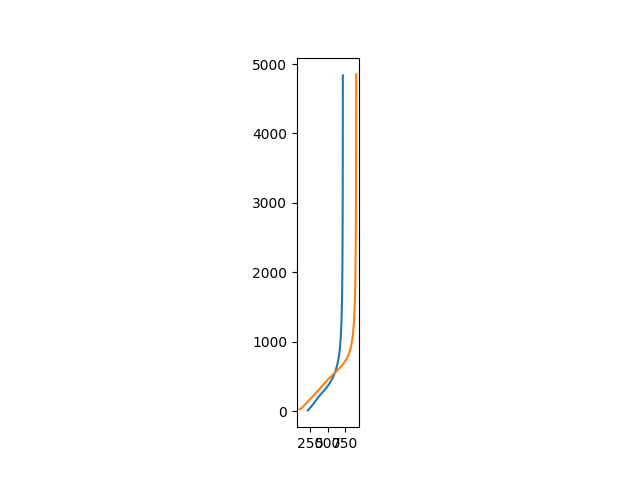

In [9]:
#wt="unit"
wt="mod"
#wt="prop"

def give_weights(z,wt):
    if (wt=="mod"):
        return np.concatenate((np.abs(z),np.abs(z)))
    elif (wt=="prop"):
        return np.concatenate((np.real(z),np.imag(z)))
    elif (wt=="" or wt=="unit"):
        return np.ones(2*len(z))
# zexp=cmodel.predict(frequencies=freq_list)
# zexp_noise=np.real(zexp)+np.random.normal(0,0.01,(len(zexp)))*np.real(zexp)+(np.imag(zexp)+np.random.normal(0,0.01,(len(zexp)))*np.imag(zexp))*1j
fig, ax =plt.subplots()
mp.dps=100
zilin=cmodel4.predict(frequencies=freq_list)
# ax.plot([0,delta1,delta1,1],[R1,R1,R2,R2])
# ax.plot(np.real(zexp_noise),-np.imag(zexp_noise))
ax.plot(np.real(zilin),-np.imag(zilin))
ax.plot(np.real(zexp),-np.imag(zexp))
ax.set_aspect("equal")
cmodel4.fit(impedance=zexp,frequencies=freq_list,sigma=give_weights(zexp,wt),bounds=[(0,0,0,0.5,0,0,0,0.5),(np.inf,np.inf,np.inf,1,np.inf,np.inf,np.inf,1)])

In [5]:
zilin

array([nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+n